In [1]:
import pandas as pd
from google.colab import drive
import os

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Define file path
file_path1 = "/content/drive/My Drive/canopy.xlsx"
file_path2 = "/content/drive/My Drive/domain_properties.csv"

Mounted at /content/drive


In [3]:
!pip install "dask[dataframe]"

In [4]:
# Read the Excel file into a DataFrame
canopy_df = pd.read_excel(file_path1)

# Display the first few rows to verify
canopy_df.head()

,Suburb Reference,Suburb (m2),2019 Canopy (m2),2019 Canopy %
0,ABBOTSBURY,4961070.0,1305410,26.31310
1,ABBOTSFORD,1016340.0,211744,20.83400
2,ACACIA GARDENS,984031.0,70460,7.16034
3,AGNES BANKS,16187100.0,3963650,24.48650
4,AIRDS,2409700.0,748092,31.04500


In [5]:
# Read the Excel file into a DataFrame
prices_df = pd.read_csv(file_path2)

# Display the first few rows to verify
prices_df.head()

,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,530000,13/1/16,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,525000,13/1/16,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54
2,480000,13/1/16,Chittaway Bay,2,4,2,468,House,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59
3,452000,13/1/16,Leumeah,1,3,1,344,House,9835,32292,4.055,-34.05375,150.83957,81,2.0,150.9,40.12
4,365500,13/1/16,North Avoca,0,0,0,1850,Vacant land,2200,45084,1.497,-33.45608,151.43598,18,2.0,150.9,49.98


In [6]:
# Convert date column to datetime format
prices_df['date_sold'] = pd.to_datetime(prices_df['date_sold'], format='%d/%m/%y')

# Filter for 2019
prices_df_2019 = prices_df[prices_df['date_sold'].dt.year == 2019]

# Display results
print("Filtered First Dataset:")
display(prices_df_2019.head())

Filtered First Dataset:


,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
3039,642000,2019-01-14,Wyoming,2,4,2,689,House,10134,29380,7.138,-33.40534,151.36250,32,1.5,154.2,52.93
3040,2150000,2019-01-15,Dulwich Hill,1,4,0,421,House,13715,47528,2.122,-33.90470,151.13884,32,1.5,154.2,7.90
3041,670000,2019-01-15,Granville,1,2,1,502,House,15332,26208,3.333,-33.83592,151.00745,20,1.5,154.2,19.01
3042,750000,2019-01-16,East Gosford,1,3,1,575,House,4238,31252,2.079,-33.43514,151.35463,15,1.5,154.2,49.55
3043,1850000,2019-01-17,Summer Hill,3,4,2,518,House,7311,51636,1.203,-33.89348,151.13720,29,1.5,154.2,7.42


In [7]:
# Count the number of rows remaining
count_df1 = prices_df_2019.shape[0]
print(f"Rows remaining in first dataset: {count_df1}")

Rows remaining in first dataset: 1159


In [8]:
# List of unique suburbs in prices_df_2019
unique_suburbs = prices_df_2019['suburb'].unique()

# Display the unique suburbs
print("Unique suburbs in prices_df_2019:")
print(unique_suburbs)

Unique suburbs in prices_df_2019:
['Wyoming' 'Dulwich Hill' 'Granville' 'East Gosford' 'Summer Hill'
 'Watanobbi' 'Tascott' 'Currans Hill' 'Emu Plains' 'Ambarvale' 'Budgewoi'
 'Wagstaffe' 'Sandringham' 'East Killara' 'Queenscliff' 'Lindfield'
 'Lake Haven' 'Blackwall' 'Kirkham' 'Wadalba' 'Toowoon Bay' 'Kyle Bay'
 'Redfern' 'Five Dock' 'Alexandria' 'Glenmore Park' 'Northmead' 'Jannali'
 'Smithfield' 'Merrylands' 'East Lindfield' 'Asquith' 'Rouse Hill'
 'Bossley Park' 'Claremont Meadows' 'Willoughby' 'West Pennant Hills'
 'Miranda' 'Rosemeadow' 'Terrey Hills' 'Campbelltown' 'Malabar'
 'Bass Hill' 'Seven Hills' 'Homebush' 'Killcare' 'Denistone West'
 'Marayong' 'Kogarah' 'Port Hacking' 'Greenwich' 'Carss Park'
 'Spring Farm' 'Panania' 'Church Point' 'Quakers Hill' 'Colyton'
 'Charmhaven' 'Kingsford' 'Bondi' 'Bondi Junction' 'Warrimoo'
 'Forresters Beach' 'Fairlight' 'Dundas Valley' 'Carlingford' 'Waterloo'
 'Kogarah Bay' 'Coogee' 'Forestville' 'Surry Hills' 'Point Frederick'
 'Wareemba' '

In [9]:
# List of unique suburbs in canopy_df
unique_suburbs = canopy_df['Suburb Reference'].unique()

# Display the unique suburbs
print("Unique suburbs in canopy_df:")
print(unique_suburbs)

Unique suburbs in canopy_df:
['ABBOTSBURY' 'ABBOTSFORD' 'ACACIA GARDENS' 'AGNES BANKS' 'AIRDS'
 'ALEXANDRIA' 'ALFORDS POINT' 'ALLAMBIE HEIGHTS' 'ALLAWAH' 'AMBARVALE'
 'ANNANDALE' 'ANNANGROVE' 'APPIN' 'ARCADIA' 'ARNCLIFFE' 'ARNDELL PARK'
 'ARTARMON' 'ASHBURY' 'ASHCROFT' 'ASHFIELD' 'ASQUITH' 'AUBURN' 'AUSTRAL'
 'AVALON BEACH' 'BADGERYS CREEK' 'BALGOWLAH' 'BALGOWLAH HEIGHTS' 'BALMAIN'
 'BALMAIN EAST' 'BANGOR' 'BANKSIA' 'BANKSMEADOW' 'BANKSTOWN'
 'BANKSTOWN AERODROME' 'BARANGAROO' 'BARDEN RIDGE' 'BARDIA'
 'BARDWELL PARK' 'BARDWELL VALLEY' 'BARGO' 'BASS HILL' 'BAULKHAM HILLS'
 'BAYVIEW' 'BEACON HILL' 'BEACONSFIELD' 'BEAUMONT HILLS' 'BEECROFT'
 'BELFIELD' 'BELIMBLA PARK' 'BELL' 'BELLA VISTA' 'BELLEVUE HILL' 'BELMORE'
 'BELROSE' 'BERALA' 'BERAMBING' 'BERKSHIRE PARK' 'BEROWRA' 'BEROWRA CREEK'
 'BEROWRA HEIGHTS' 'BEROWRA WATERS' 'BERRILEE' 'BEVERLEY PARK'
 'BEVERLY HILLS' 'BEXLEY' 'BEXLEY NORTH' 'BICKLEY VALE' 'BIDWILL'
 'BILGOLA BEACH' 'BILGOLA PLATEAU' 'BILPIN' 'BIRCHGROVE' 'BIRRONG'
 'BLACKE

In [10]:
# Convert 'suburb' column to lowercase
prices_df_2019['suburb'] = prices_df_2019['suburb'].str.lower()
canopy_df['Suburb Reference'] = canopy_df['Suburb Reference'].str.lower()

# Verify the change by displaying the first few rows
print(prices_df_2019[['suburb']].head())
print(canopy_df[['Suburb Reference']].head())

            suburb
3039       wyoming
3040  dulwich hill
3041     granville
3042  east gosford
3043   summer hill
  Suburb Reference
0       abbotsbury
1       abbotsford
2   acacia gardens
3      agnes banks
4            airds


<ipython-input-10-f6ea6a79add3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_df_2019['suburb'] = prices_df_2019['suburb'].str.lower()


In [11]:
# Merge datasets on suburb columns
merged_df = prices_df_2019.merge(canopy_df, left_on='suburb', right_on='Suburb Reference', how='inner')

# Display first few rows
print("Merged Dataset:")
display(merged_df.head())

# Check row count after merging
print(f"Total rows in merged dataset: {merged_df.shape[0]}")

Merged Dataset:


,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,...,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd,Suburb Reference,Suburb (m2),2019 Canopy (m2),2019 Canopy %
0,2150000,2019-01-15,dulwich hill,1,4,0,421,House,13715,47528,...,-33.90470,151.13884,32,1.5,154.2,7.90,dulwich hill,2080700.0,386780,18.5889
1,670000,2019-01-15,granville,1,2,1,502,House,15332,26208,...,-33.83592,151.00745,20,1.5,154.2,19.01,granville,3289340.0,374568,11.3873
2,1850000,2019-01-17,summer hill,3,4,2,518,House,7311,51636,...,-33.89348,151.13720,29,1.5,154.2,7.42,summer hill,1212760.0,257740,21.2523
3,660000,2019-01-21,granville,2,5,2,426,House,15332,26208,...,-33.83592,151.00745,20,1.5,154.2,19.01,granville,3289340.0,374568,11.3873
4,655000,2019-01-21,currans hill,1,4,1,508,House,5309,42276,...,-34.04634,150.77377,115,1.5,154.2,45.05,currans hill,3596400.0,301684,8.3885


Total rows in merged dataset: 1000


In [12]:
# Check for missing values in each column
null_counts = merged_df.isnull().sum()

# Display columns with null values
print("Null values per column:")
print(null_counts[null_counts > 0])

Null values per column:
Series([], dtype: int64)


In [13]:
# Drop columns
columns_to_drop = ['suburb_lat', 'suburb_lng', 'suburb_elevation', 'cash_rate', 'property_inflation_index', 'Suburb Reference']  # List of columns to drop
merged_df = merged_df.drop(columns=columns_to_drop)

In [14]:
merged_df['year_sold'] = merged_df['date_sold'].dt.year
merged_df['month_sold'] = merged_df['date_sold'].dt.month
merged_df['day_sold'] = merged_df['date_sold'].dt.day

# Drop the original datetime column
merged_df_numeric = merged_df.drop(columns=['date_sold'], errors='ignore')

# Remove white spaces
merged_df_numeric.columns = merged_df_numeric.columns.str.replace(" ", "_")

In [15]:
display(merged_df_numeric.head())

,price,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,km_from_cbd,Suburb_(m2),2019_Canopy_(m2),2019_Canopy_%,year_sold,month_sold,day_sold
0,2150000,dulwich hill,1,4,0,421,House,13715,47528,2.122,7.90,2080700.0,386780,18.5889,2019,1,15
1,670000,granville,1,2,1,502,House,15332,26208,3.333,19.01,3289340.0,374568,11.3873,2019,1,15
2,1850000,summer hill,3,4,2,518,House,7311,51636,1.203,7.42,1212760.0,257740,21.2523,2019,1,17
3,660000,granville,2,5,2,426,House,15332,26208,3.333,19.01,3289340.0,374568,11.3873,2019,1,21
4,655000,currans hill,1,4,1,508,House,5309,42276,3.608,45.05,3596400.0,301684,8.3885,2019,1,21


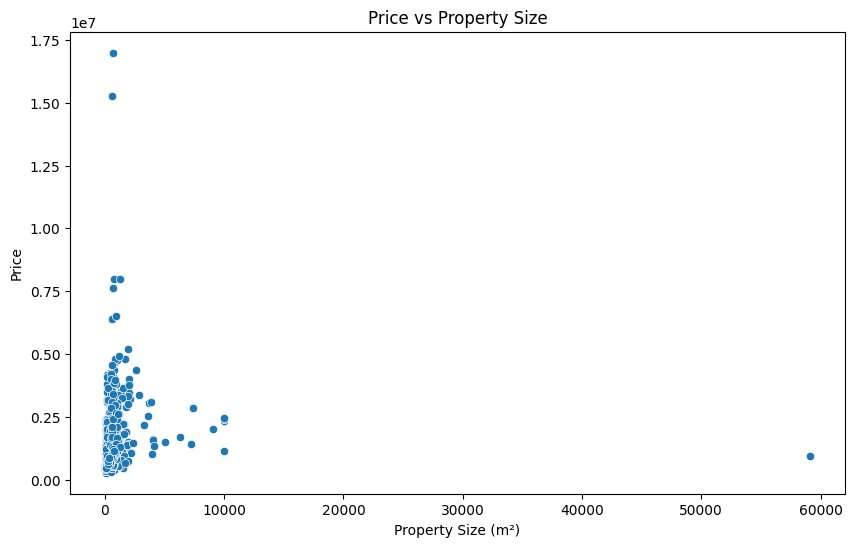

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_numeric, x='property_size', y='price')
plt.title('Price vs Property Size')
plt.xlabel('Property Size (m²)')
plt.ylabel('Price')
plt.show()


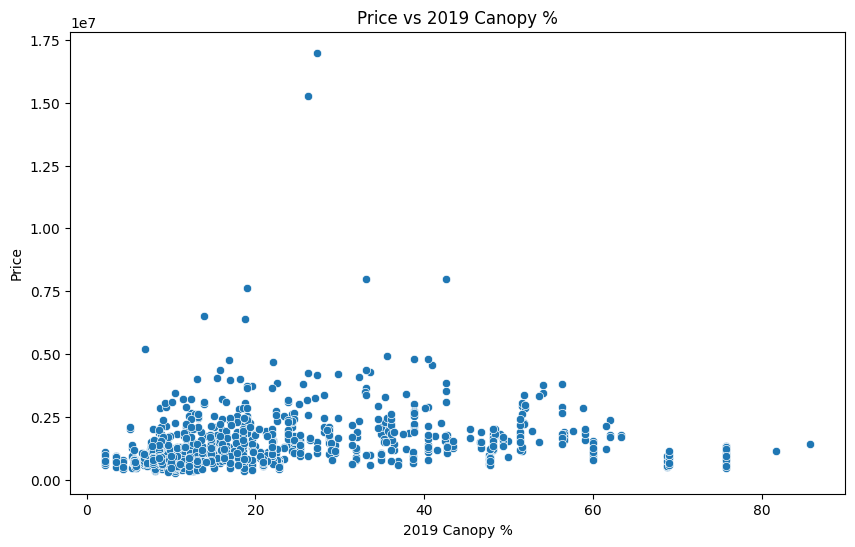

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_numeric, x='2019_Canopy_%', y='price')
plt.title('Price vs 2019 Canopy %')
plt.xlabel('2019 Canopy %')
plt.ylabel('Price')
plt.show()


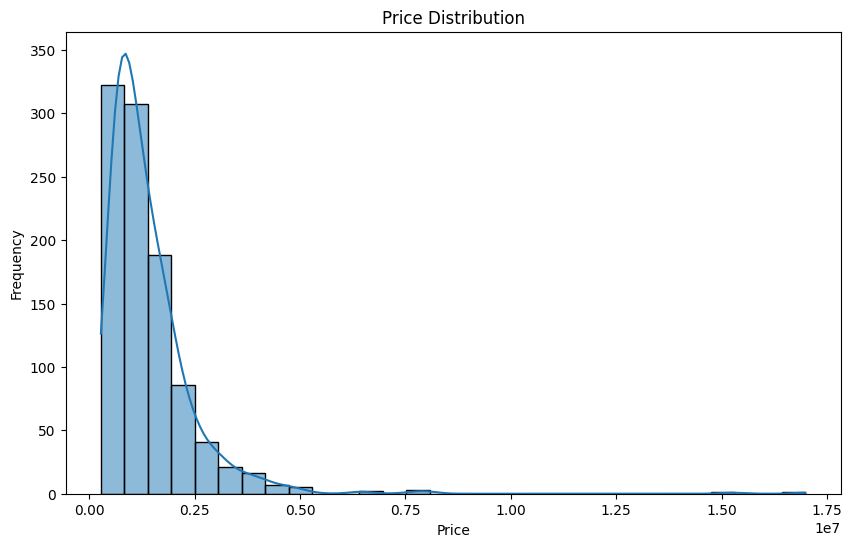

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df_numeric['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

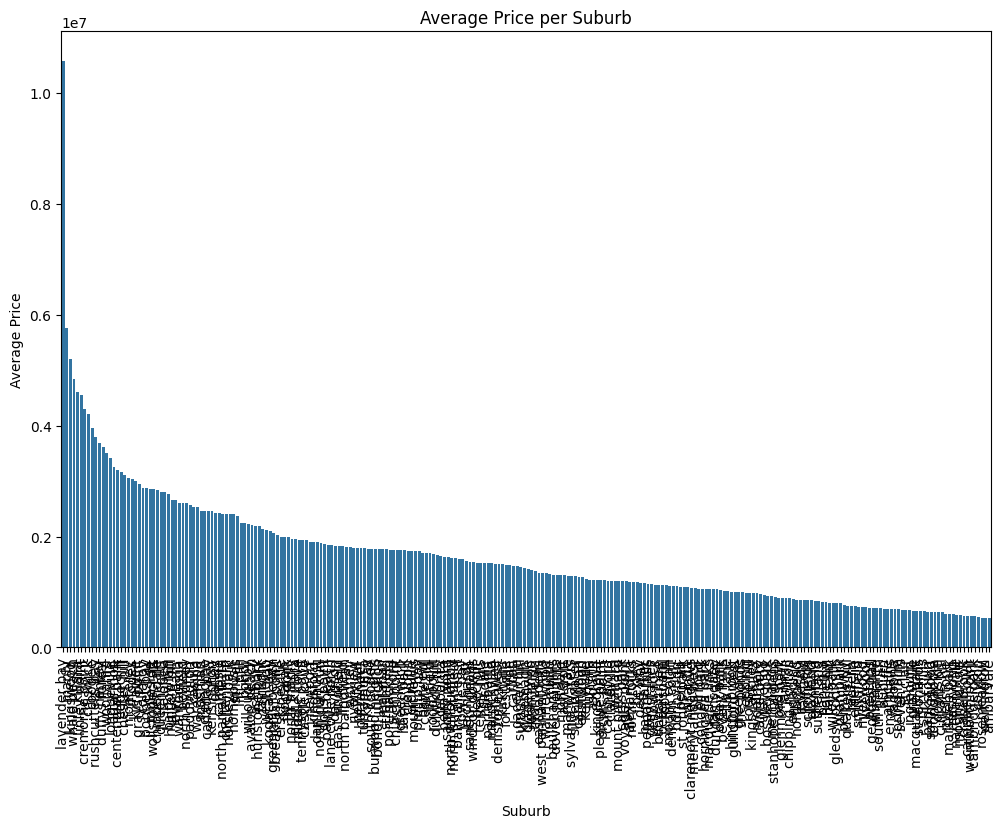

In [19]:
avg_price_suburb = merged_df_numeric.groupby('suburb')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_suburb.index, y=avg_price_suburb.values)
plt.title('Average Price per Suburb')
plt.xlabel('Suburb')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

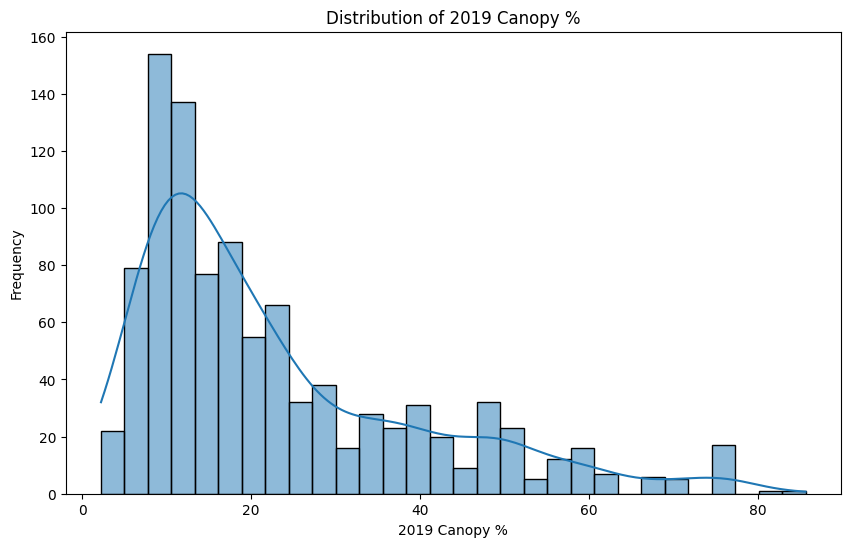

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df_numeric['2019_Canopy_%'], bins=30, kde=True)
plt.title('Distribution of 2019 Canopy %')
plt.xlabel('2019 Canopy %')
plt.ylabel('Frequency')
plt.show()


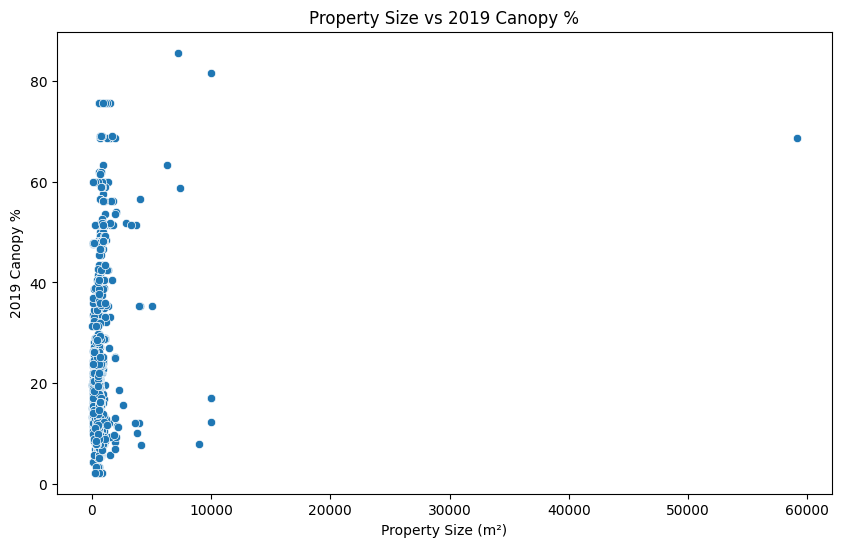

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_numeric, x='property_size', y='2019_Canopy_%')
plt.title('Property Size vs 2019 Canopy %')
plt.xlabel('Property Size (m²)')
plt.ylabel('2019 Canopy %')
plt.show()


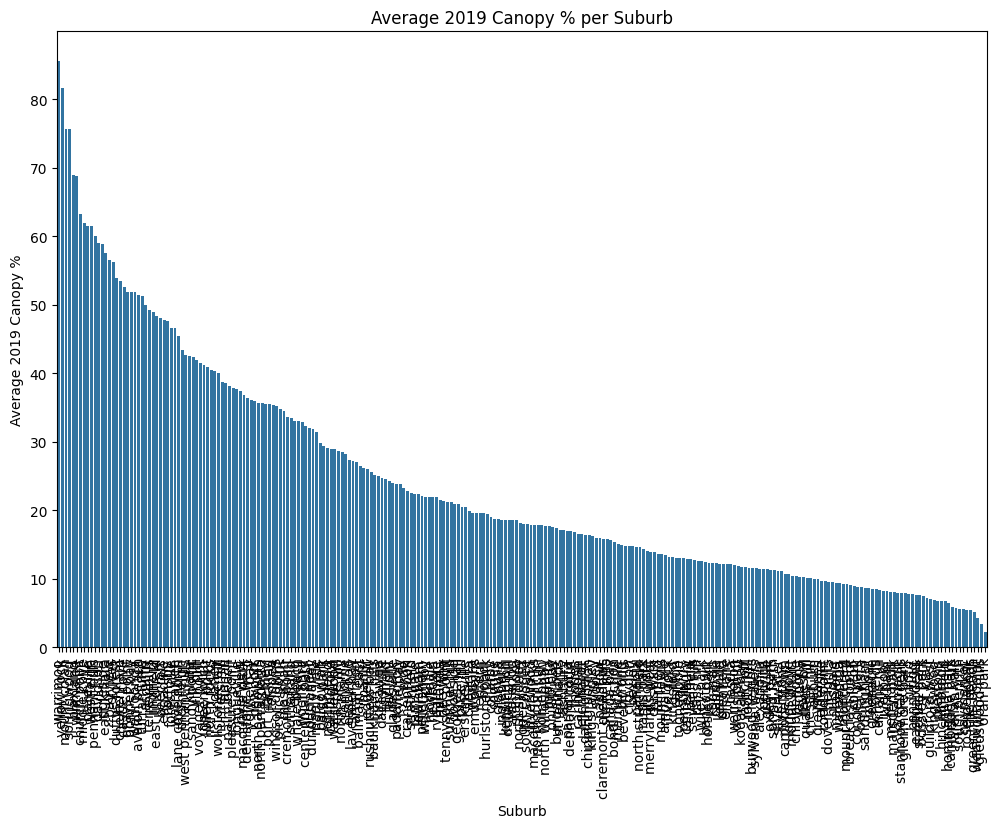

In [22]:
avg_canopy_suburb = merged_df_numeric.groupby('suburb')['2019_Canopy_%'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_canopy_suburb.index, y=avg_canopy_suburb.values)
plt.title('Average 2019 Canopy % per Suburb')
plt.xlabel('Suburb')
plt.ylabel('Average 2019 Canopy %')
plt.xticks(rotation=90)
plt.show()

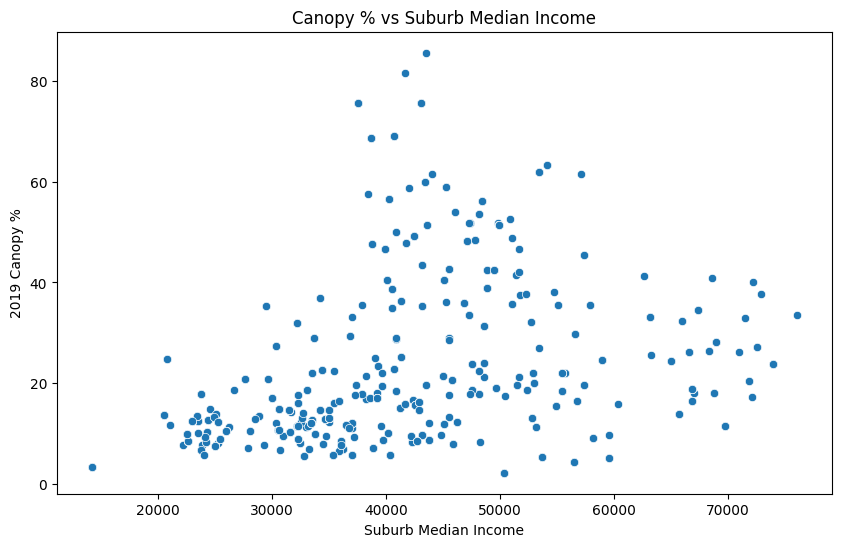

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_numeric, x='suburb_median_income', y='2019_Canopy_%')
plt.title('Canopy % vs Suburb Median Income')
plt.xlabel('Suburb Median Income')
plt.ylabel('2019 Canopy %')
plt.show()


### Linear Regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Select features and target variable
X = merged_df_numeric[['2019_Canopy_%']]  # Feature
y = merged_df_numeric['price']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 573400.3891083233
R² Score: 0.06235445231759107


### Multiple Linear Regression

In [25]:
X = merged_df_numeric[['2019_Canopy_%', 'property_size', 'suburb_population', 'km_from_cbd']]
y = merged_df_numeric['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 595659.1264383632
R² Score: -1.6759947914173243


Previous two models doing terribly. Checking feature importance

In [26]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
merged_df_numeric['suburb'] = label_enc.fit_transform(merged_df['suburb'])
merged_df_numeric['type'] = label_enc.fit_transform(merged_df['type'])

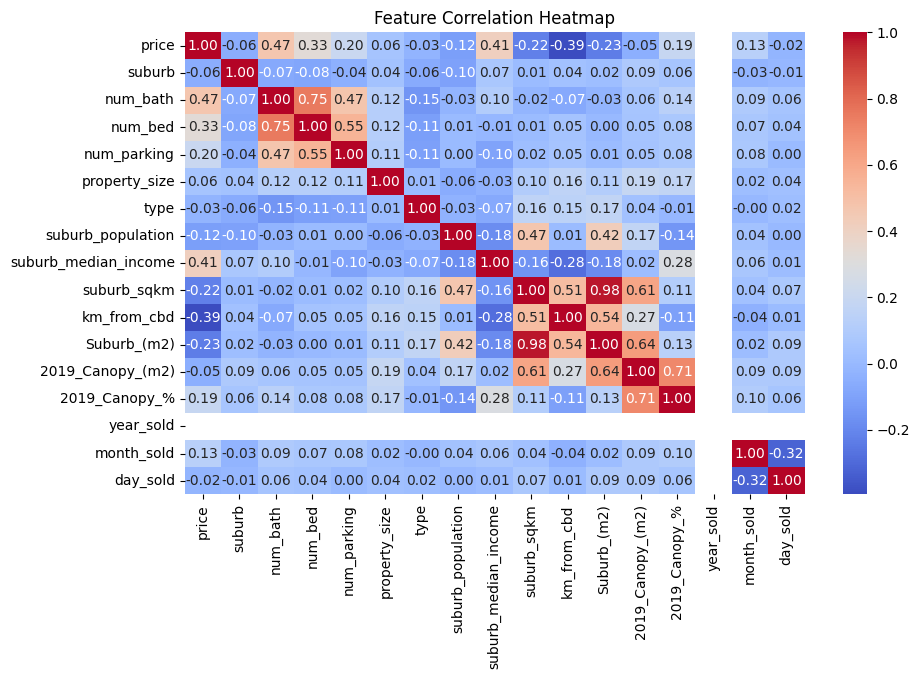

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(merged_df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


### LightGBM

In [29]:
display(merged_df_numeric.head())

,price,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,km_from_cbd,Suburb_(m2),2019_Canopy_(m2),2019_Canopy_%,year_sold,month_sold,day_sold
0,2150000,73,1,4,0,421,5,13715,47528,2.122,7.90,2080700.0,386780,18.5889,2019,1,15
1,670000,95,1,2,1,502,5,15332,26208,3.333,19.01,3289340.0,374568,11.3873,2019,1,15
2,1850000,221,3,4,2,518,5,7311,51636,1.203,7.42,1212760.0,257740,21.2523,2019,1,17
3,660000,95,2,5,2,426,5,15332,26208,3.333,19.01,3289340.0,374568,11.3873,2019,1,21
4,655000,62,1,4,1,508,5,5309,42276,3.608,45.05,3596400.0,301684,8.3885,2019,1,21


In [30]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 15.8 MB/s eta 0:00:00


In [31]:
import lightgbm as lgb
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Define features and target
X = merged_df_numeric.drop(columns=['price'])
y = merged_df_numeric['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optuna optimization function
def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'mae',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 1.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 1.0),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 200),
        'max_bin': trial.suggest_int('max_bin', 100, 500),
        'verbose': -1
    }

    # Convert to LightGBM dataset format
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    # Train model
    model = lgb.train(
        params,
        train_data,
        num_boost_round=2000,  # ⬆️ Increased boosting rounds
        valid_sets=[valid_data],
        callbacks=[lgb.early_stopping(100)],  # ⬆️ More patience
    )

    # Predict and evaluate
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)
    mae = mean_absolute_error(y_test, y_pred)

    return mae  # Minimize MAE

# Run Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)  # ⬆️ More trials for better tuning

# Print best parameters
print("Best parameters:", study.best_params)

# Train final model with best parameters
best_params = study.best_params
best_params['objective'] = 'regression'
best_params['metric'] = 'mae'
best_params['boosting_type'] = 'gbdt'
best_params['verbose'] = -1

# Convert to LightGBM dataset format again
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

final_model = lgb.train(
    best_params,
    train_data,
    num_boost_round=2000,  # ⬆️ More boosting rounds
    valid_sets=[valid_data],
    callbacks=[lgb.early_stopping(100)]
)

# Predictions
y_pred_final = final_model.predict(X_test, num_iteration=final_model.best_iteration)

# Final evaluation
mae_final = mean_absolute_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print(f"✅ Final Mean Absolute Error: {mae_final:.2f}")
print(f"✅ Final R² Score: {r2_final:.4f}")


[I 2025-04-12 09:46:00,863] A new study created in memory with name: no-name-8e56b728-aad1-4c2e-ba2b-80e216e91ea8


Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:00,931] Trial 0 finished with value: 300238.2102457639 and parameters: {'num_leaves': 197, 'learning_rate': 0.08643729996921004, 'max_depth': 5, 'lambda_l1': 0.7108177535374653, 'lambda_l2': 0.0431876424939619, 'feature_fraction': 0.4869213105681366, 'bagging_fraction': 0.8123863171778747, 'bagging_freq': 5, 'min_data_in_leaf': 45, 'max_bin': 344}. Best is trial 0 with value: 300238.2102457639.
[I 2025-04-12 09:46:00,981] Trial 1 finished with value: 360827.2842369479 and parameters: {'num_leaves': 23, 'learning_rate': 0.021381433355048732, 'max_depth': 13, 'lambda_l1': 0.35927952525173923, 'lambda_l2': 0.9967058352412176, 'feature_fraction': 0.6326322831994415, 'bagging_fraction': 0.5599994587998696, 'bagging_freq': 9, 'min_data_in_leaf': 105, 'max_bin': 241}. Best is trial 0 with value: 300238.2102457639.
[I 2025-04-12 09:46:01,065] Trial 2 finished with value: 362029.85279768077 and parameters: {'num_leaves': 159, 'learning_rate': 0.06062891287515325, 'max_depth'

Early stopping, best iteration is:
[75]	valid_0's l1: 300238
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[163]	valid_0's l1: 360827
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's l1: 362030
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:01,478] Trial 3 finished with value: 375970.6967110185 and parameters: {'num_leaves': 117, 'learning_rate': 0.0900384299236952, 'max_depth': 14, 'lambda_l1': 0.5949416233654536, 'lambda_l2': 0.40820366998673596, 'feature_fraction': 0.8506853476239261, 'bagging_fraction': 0.7446505985442391, 'bagging_freq': 1, 'min_data_in_leaf': 110, 'max_bin': 343}. Best is trial 0 with value: 300238.2102457639.
[I 2025-04-12 09:46:01,510] Trial 4 finished with value: 378742.6521383478 and parameters: {'num_leaves': 138, 'learning_rate': 0.09099271374165746, 'max_depth': 9, 'lambda_l1': 0.7839042077235283, 'lambda_l2': 0.1347579147548501, 'feature_fraction': 0.869399234806036, 'bagging_fraction': 0.8996834550310863, 'bagging_freq': 10, 'min_data_in_leaf': 187, 'max_bin': 270}. Best is trial 0 with value: 300238.2102457639.
[I 2025-04-12 09:46:01,608] Trial 5 finished with value: 346119.3682311419 and parameters: {'num_leaves': 120, 'learning_rate': 0.09268202956422364, 'max_depth':

Early stopping, best iteration is:
[28]	valid_0's l1: 375971
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's l1: 378743
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[259]	valid_0's l1: 346119
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:01,736] Trial 6 finished with value: 363582.8597921711 and parameters: {'num_leaves': 148, 'learning_rate': 0.09124005222177252, 'max_depth': 7, 'lambda_l1': 0.49108918526972134, 'lambda_l2': 0.007755772278784989, 'feature_fraction': 0.8425888198241893, 'bagging_fraction': 0.8978792061573382, 'bagging_freq': 9, 'min_data_in_leaf': 117, 'max_bin': 198}. Best is trial 0 with value: 300238.2102457639.


Early stopping, best iteration is:
[206]	valid_0's l1: 363583
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:02,085] Trial 7 finished with value: 360054.59724986466 and parameters: {'num_leaves': 131, 'learning_rate': 0.008834434430280338, 'max_depth': 19, 'lambda_l1': 0.6833141430738474, 'lambda_l2': 0.49905886666694055, 'feature_fraction': 0.6237023784948723, 'bagging_fraction': 0.6069598103637659, 'bagging_freq': 10, 'min_data_in_leaf': 81, 'max_bin': 344}. Best is trial 0 with value: 300238.2102457639.
[I 2025-04-12 09:46:02,158] Trial 8 finished with value: 363015.28379228065 and parameters: {'num_leaves': 295, 'learning_rate': 0.0743799577583769, 'max_depth': 15, 'lambda_l1': 0.35561707668340037, 'lambda_l2': 0.5128024546151959, 'feature_fraction': 0.65137347864228, 'bagging_fraction': 0.7804694574270098, 'bagging_freq': 3, 'min_data_in_leaf': 149, 'max_bin': 492}. Best is trial 0 with value: 300238.2102457639.
[I 2025-04-12 09:46:02,206] Trial 9 finished with value: 331861.0801055699 and parameters: {'num_leaves': 97, 'learning_rate': 0.08536126481245425, 'max_depth

Early stopping, best iteration is:
[450]	valid_0's l1: 360055
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's l1: 363015
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[75]	valid_0's l1: 331861


[I 2025-04-12 09:46:02,338] Trial 10 finished with value: 323224.9515622065 and parameters: {'num_leaves': 245, 'learning_rate': 0.0385115148776667, 'max_depth': 3, 'lambda_l1': 0.006169784428218694, 'lambda_l2': 0.7579261620408605, 'feature_fraction': 0.4100982856563058, 'bagging_fraction': 0.4315478487781387, 'bagging_freq': 6, 'min_data_in_leaf': 34, 'max_bin': 114}. Best is trial 0 with value: 300238.2102457639.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[191]	valid_0's l1: 323225


[I 2025-04-12 09:46:02,678] Trial 11 finished with value: 310799.6107116215 and parameters: {'num_leaves': 248, 'learning_rate': 0.03899837799477149, 'max_depth': 3, 'lambda_l1': 0.028379946202904884, 'lambda_l2': 0.7861574287687978, 'feature_fraction': 0.4097680495470055, 'bagging_fraction': 0.4372813597875032, 'bagging_freq': 6, 'min_data_in_leaf': 20, 'max_bin': 104}. Best is trial 0 with value: 300238.2102457639.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[203]	valid_0's l1: 310800


[I 2025-04-12 09:46:02,912] Trial 12 finished with value: 292112.7556746811 and parameters: {'num_leaves': 217, 'learning_rate': 0.044798691361025024, 'max_depth': 3, 'lambda_l1': 0.08988620937501442, 'lambda_l2': 0.9227513217821754, 'feature_fraction': 0.4992703273304817, 'bagging_fraction': 0.43559451878232774, 'bagging_freq': 4, 'min_data_in_leaf': 18, 'max_bin': 106}. Best is trial 12 with value: 292112.7556746811.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[160]	valid_0's l1: 292113


[I 2025-04-12 09:46:03,206] Trial 13 finished with value: 303606.5281629595 and parameters: {'num_leaves': 209, 'learning_rate': 0.059677664632473, 'max_depth': 6, 'lambda_l1': 0.8410229799318814, 'lambda_l2': 0.9710181097083541, 'feature_fraction': 0.5256789095993918, 'bagging_fraction': 0.9518368291822259, 'bagging_freq': 4, 'min_data_in_leaf': 56, 'max_bin': 434}. Best is trial 12 with value: 292112.7556746811.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[94]	valid_0's l1: 303607
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:04,655] Trial 14 finished with value: 278272.59557808656 and parameters: {'num_leaves': 201, 'learning_rate': 0.045625425141087625, 'max_depth': 10, 'lambda_l1': 0.22977520606979612, 'lambda_l2': 0.5967549226098419, 'feature_fraction': 0.5185827981930912, 'bagging_fraction': 0.6461547978144544, 'bagging_freq': 4, 'min_data_in_leaf': 12, 'max_bin': 177}. Best is trial 14 with value: 278272.59557808656.


Early stopping, best iteration is:
[300]	valid_0's l1: 278273
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:05,986] Trial 15 finished with value: 263366.69682410563 and parameters: {'num_leaves': 199, 'learning_rate': 0.038893154229528645, 'max_depth': 9, 'lambda_l1': 0.16026408163853606, 'lambda_l2': 0.6177373120789975, 'feature_fraction': 0.553137376282415, 'bagging_fraction': 0.6277455852397416, 'bagging_freq': 3, 'min_data_in_leaf': 10, 'max_bin': 193}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[225]	valid_0's l1: 263367
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:06,622] Trial 16 finished with value: 332103.1321254552 and parameters: {'num_leaves': 74, 'learning_rate': 0.027038669286069253, 'max_depth': 10, 'lambda_l1': 0.1895633804806494, 'lambda_l2': 0.5970003158970205, 'feature_fraction': 0.7450055842975053, 'bagging_fraction': 0.6369782288903554, 'bagging_freq': 2, 'min_data_in_leaf': 69, 'max_bin': 175}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[257]	valid_0's l1: 332103
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:07,587] Trial 17 finished with value: 288897.90180602664 and parameters: {'num_leaves': 184, 'learning_rate': 0.053217253833351505, 'max_depth': 11, 'lambda_l1': 0.190552463209189, 'lambda_l2': 0.6405090686873107, 'feature_fraction': 0.5572490609041798, 'bagging_fraction': 0.6451612031296775, 'bagging_freq': 3, 'min_data_in_leaf': 14, 'max_bin': 171}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[176]	valid_0's l1: 288898


[I 2025-04-12 09:46:07,891] Trial 18 finished with value: 381141.7454191045 and parameters: {'num_leaves': 295, 'learning_rate': 0.02657836783117563, 'max_depth': 8, 'lambda_l1': 0.19861236511287986, 'lambda_l2': 0.8334565072484745, 'feature_fraction': 0.7139333858994752, 'bagging_fraction': 0.5232894627821487, 'bagging_freq': 5, 'min_data_in_leaf': 142, 'max_bin': 157}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[170]	valid_0's l1: 381142
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[78]	valid_0's l1: 301734


[I 2025-04-12 09:46:08,760] Trial 19 finished with value: 301733.58512920217 and parameters: {'num_leaves': 254, 'learning_rate': 0.0727078596013561, 'max_depth': 13, 'lambda_l1': 0.4612529599142024, 'lambda_l2': 0.4099515525902627, 'feature_fraction': 0.5882568288065584, 'bagging_fraction': 0.6778635197119159, 'bagging_freq': 2, 'min_data_in_leaf': 35, 'max_bin': 217}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:09,212] Trial 20 finished with value: 404942.84267197835 and parameters: {'num_leaves': 178, 'learning_rate': 0.00785064622984713, 'max_depth': 11, 'lambda_l1': 0.2869852237093806, 'lambda_l2': 0.5476819671140372, 'feature_fraction': 0.7777657009460432, 'bagging_fraction': 0.50762930895327, 'bagging_freq': 7, 'min_data_in_leaf': 196, 'max_bin': 146}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[619]	valid_0's l1: 404112
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:14,220] Trial 21 finished with value: 276866.18516846886 and parameters: {'num_leaves': 180, 'learning_rate': 0.05116089145453642, 'max_depth': 11, 'lambda_l1': 0.14314070463230402, 'lambda_l2': 0.657394636314606, 'feature_fraction': 0.5580355379514452, 'bagging_fraction': 0.639431089691654, 'bagging_freq': 3, 'min_data_in_leaf': 10, 'max_bin': 193}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[171]	valid_0's l1: 276866
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:15,600] Trial 22 finished with value: 292719.79572491033 and parameters: {'num_leaves': 225, 'learning_rate': 0.04568253862099774, 'max_depth': 16, 'lambda_l1': 0.09073361471600161, 'lambda_l2': 0.7012297302846058, 'feature_fraction': 0.4775413384179214, 'bagging_fraction': 0.5993623576700066, 'bagging_freq': 4, 'min_data_in_leaf': 13, 'max_bin': 213}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[100]	valid_0's l1: 292720
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:16,745] Trial 23 finished with value: 301801.4782049512 and parameters: {'num_leaves': 173, 'learning_rate': 0.03673796615643668, 'max_depth': 9, 'lambda_l1': 0.12864241300550053, 'lambda_l2': 0.8551025339630279, 'feature_fraction': 0.5609119533760435, 'bagging_fraction': 0.6816991623502866, 'bagging_freq': 2, 'min_data_in_leaf': 31, 'max_bin': 286}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[147]	valid_0's l1: 301801
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:18,730] Trial 24 finished with value: 286820.47036579275 and parameters: {'num_leaves': 227, 'learning_rate': 0.05485387329009503, 'max_depth': 11, 'lambda_l1': 0.25482847071887943, 'lambda_l2': 0.4336006300466927, 'feature_fraction': 0.46501683403167227, 'bagging_fraction': 0.8195063041034717, 'bagging_freq': 4, 'min_data_in_leaf': 10, 'max_bin': 138}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[91]	valid_0's l1: 286820
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:19,470] Trial 25 finished with value: 326952.7478635606 and parameters: {'num_leaves': 195, 'learning_rate': 0.06602596765438114, 'max_depth': 12, 'lambda_l1': 0.410433553831183, 'lambda_l2': 0.6050474451125072, 'feature_fraction': 0.5874086205677727, 'bagging_fraction': 0.4957032587836334, 'bagging_freq': 3, 'min_data_in_leaf': 59, 'max_bin': 194}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[183]	valid_0's l1: 326953
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:19,725] Trial 26 finished with value: 301175.1035060673 and parameters: {'num_leaves': 267, 'learning_rate': 0.04663656088270197, 'max_depth': 8, 'lambda_l1': 0.1430799339824061, 'lambda_l2': 0.7208752420713787, 'feature_fraction': 0.5315501823134976, 'bagging_fraction': 0.5981707400997552, 'bagging_freq': 5, 'min_data_in_leaf': 32, 'max_bin': 247}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[75]	valid_0's l1: 301175
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:20,432] Trial 27 finished with value: 326481.5962619618 and parameters: {'num_leaves': 164, 'learning_rate': 0.029677446074719872, 'max_depth': 9, 'lambda_l1': 0.056979555828873485, 'lambda_l2': 0.33833825969660175, 'feature_fraction': 0.6948855413744952, 'bagging_fraction': 0.7051574892888817, 'bagging_freq': 2, 'min_data_in_leaf': 73, 'max_bin': 179}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[334]	valid_0's l1: 326482
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:20,936] Trial 28 finished with value: 315578.93598333007 and parameters: {'num_leaves': 199, 'learning_rate': 0.03372551020487875, 'max_depth': 16, 'lambda_l1': 0.22741177901321916, 'lambda_l2': 0.6612524326621543, 'feature_fraction': 0.4544700182289816, 'bagging_fraction': 0.6423168676019129, 'bagging_freq': 1, 'min_data_in_leaf': 45, 'max_bin': 136}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[156]	valid_0's l1: 315579
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:22,377] Trial 29 finished with value: 298262.3547098898 and parameters: {'num_leaves': 189, 'learning_rate': 0.01854794855412907, 'max_depth': 5, 'lambda_l1': 0.33711495559622584, 'lambda_l2': 0.5781098695329818, 'feature_fraction': 0.4964912693519512, 'bagging_fraction': 0.8323547833083399, 'bagging_freq': 4, 'min_data_in_leaf': 47, 'max_bin': 265}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[276]	valid_0's l1: 298262
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:23,602] Trial 30 finished with value: 303273.78772761516 and parameters: {'num_leaves': 67, 'learning_rate': 0.06857763350380616, 'max_depth': 12, 'lambda_l1': 0.12464677000979307, 'lambda_l2': 0.8089379499976531, 'feature_fraction': 0.6847983659670129, 'bagging_fraction': 0.5619592585058516, 'bagging_freq': 5, 'min_data_in_leaf': 23, 'max_bin': 322}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[90]	valid_0's l1: 303274
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:24,251] Trial 31 finished with value: 305792.90781825734 and parameters: {'num_leaves': 230, 'learning_rate': 0.053700395068482, 'max_depth': 10, 'lambda_l1': 0.25508926999802434, 'lambda_l2': 0.47022445131041435, 'feature_fraction': 0.45830746753999957, 'bagging_fraction': 0.8352169503135004, 'bagging_freq': 4, 'min_data_in_leaf': 27, 'max_bin': 130}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[119]	valid_0's l1: 305793
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:29,161] Trial 32 finished with value: 289247.53674662986 and parameters: {'num_leaves': 209, 'learning_rate': 0.05842778907403402, 'max_depth': 10, 'lambda_l1': 0.2897727467894059, 'lambda_l2': 0.42491101369616513, 'feature_fraction': 0.5943407916031495, 'bagging_fraction': 0.7394591722580262, 'bagging_freq': 3, 'min_data_in_leaf': 15, 'max_bin': 230}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[168]	valid_0's l1: 289248
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:30,030] Trial 33 finished with value: 278016.71593098686 and parameters: {'num_leaves': 230, 'learning_rate': 0.047859638859655204, 'max_depth': 12, 'lambda_l1': 0.4114503347722643, 'lambda_l2': 0.3298758101333054, 'feature_fraction': 0.5269238168148026, 'bagging_fraction': 0.8014713111066435, 'bagging_freq': 6, 'min_data_in_leaf': 10, 'max_bin': 163}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[150]	valid_0's l1: 278017
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:30,797] Trial 34 finished with value: 310643.7948876472 and parameters: {'num_leaves': 158, 'learning_rate': 0.046675123614998454, 'max_depth': 14, 'lambda_l1': 0.38845202617687824, 'lambda_l2': 0.24261520660590996, 'feature_fraction': 0.5217937355442613, 'bagging_fraction': 0.6811006692124467, 'bagging_freq': 7, 'min_data_in_leaf': 43, 'max_bin': 207}. Best is trial 15 with value: 263366.69682410563.
[I 2025-04-12 09:46:30,973] Trial 35 finished with value: 302456.0339166689 and parameters: {'num_leaves': 235, 'learning_rate': 0.04219886369835654, 'max_depth': 13, 'lambda_l1': 0.5908936744392664, 'lambda_l2': 0.33243794268816124, 'feature_fraction': 0.6212021060329115, 'bagging_fraction': 0.880948385833995, 'bagging_freq': 6, 'min_data_in_leaf': 39, 'max_bin': 161}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[93]	valid_0's l1: 310644
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[156]	valid_0's l1: 302456


[I 2025-04-12 09:46:31,203] Trial 36 finished with value: 294566.2279945298 and parameters: {'num_leaves': 205, 'learning_rate': 0.01862220703891669, 'max_depth': 8, 'lambda_l1': 0.42842998959773393, 'lambda_l2': 0.11331881508055189, 'feature_fraction': 0.5604392247346084, 'bagging_fraction': 0.7348665944964486, 'bagging_freq': 8, 'min_data_in_leaf': 23, 'max_bin': 187}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[243]	valid_0's l1: 294566


[I 2025-04-12 09:46:31,454] Trial 37 finished with value: 283226.0801129705 and parameters: {'num_leaves': 271, 'learning_rate': 0.04971298574254096, 'max_depth': 14, 'lambda_l1': 0.3166483615503811, 'lambda_l2': 0.5474183822301069, 'feature_fraction': 0.6479229488745825, 'bagging_fraction': 0.7797972177847833, 'bagging_freq': 5, 'min_data_in_leaf': 10, 'max_bin': 252}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[99]	valid_0's l1: 283226


[I 2025-04-12 09:46:31,566] Trial 38 finished with value: 369377.609869581 and parameters: {'num_leaves': 151, 'learning_rate': 0.03248449630786713, 'max_depth': 12, 'lambda_l1': 0.547578672516823, 'lambda_l2': 0.2788057907070836, 'feature_fraction': 0.9654977587628024, 'bagging_fraction': 0.5583433538497299, 'bagging_freq': 6, 'min_data_in_leaf': 90, 'max_bin': 229}. Best is trial 15 with value: 263366.69682410563.
[I 2025-04-12 09:46:31,668] Trial 39 finished with value: 366303.89963507967 and parameters: {'num_leaves': 22, 'learning_rate': 0.08090279025929628, 'max_depth': 9, 'lambda_l1': 0.16036945568681918, 'lambda_l2': 0.11024082488389383, 'feature_fraction': 0.5329194509385219, 'bagging_fraction': 0.6247696749294352, 'bagging_freq': 3, 'min_data_in_leaf': 121, 'max_bin': 374}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[96]	valid_0's l1: 369378
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's l1: 366304


[I 2025-04-12 09:46:31,786] Trial 40 finished with value: 330788.5214201744 and parameters: {'num_leaves': 137, 'learning_rate': 0.06036431209540581, 'max_depth': 17, 'lambda_l1': 0.5333433368840903, 'lambda_l2': 0.36963627199393884, 'feature_fraction': 0.6644215442335745, 'bagging_fraction': 0.7596531696669899, 'bagging_freq': 1, 'min_data_in_leaf': 66, 'max_bin': 267}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	valid_0's l1: 330789
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:31,977] Trial 41 finished with value: 306631.41225030745 and parameters: {'num_leaves': 274, 'learning_rate': 0.09903360369034117, 'max_depth': 14, 'lambda_l1': 0.3429835865787157, 'lambda_l2': 0.5514414013051088, 'feature_fraction': 0.6182216600594598, 'bagging_fraction': 0.7965500554048531, 'bagging_freq': 5, 'min_data_in_leaf': 25, 'max_bin': 250}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[114]	valid_0's l1: 306631
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:32,261] Trial 42 finished with value: 268882.64058401046 and parameters: {'num_leaves': 273, 'learning_rate': 0.06503779460825734, 'max_depth': 15, 'lambda_l1': 0.3208403069067259, 'lambda_l2': 0.49246534822626487, 'feature_fraction': 0.5694387115813278, 'bagging_fraction': 0.855272810419086, 'bagging_freq': 5, 'min_data_in_leaf': 11, 'max_bin': 189}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[116]	valid_0's l1: 268883
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:32,474] Trial 43 finished with value: 303688.5365218843 and parameters: {'num_leaves': 261, 'learning_rate': 0.06491587857477235, 'max_depth': 18, 'lambda_l1': 0.2425310407579569, 'lambda_l2': 0.4988923279380064, 'feature_fraction': 0.5002568221040562, 'bagging_fraction': 0.9444932407109728, 'bagging_freq': 8, 'min_data_in_leaf': 26, 'max_bin': 158}. Best is trial 15 with value: 263366.69682410563.
[I 2025-04-12 09:46:32,616] Trial 44 finished with value: 301550.8892471858 and parameters: {'num_leaves': 287, 'learning_rate': 0.05570857416824114, 'max_depth': 15, 'lambda_l1': 0.3956476177316442, 'lambda_l2': 0.634113621418014, 'feature_fraction': 0.4379445838492424, 'bagging_fraction': 0.8516455577752432, 'bagging_freq': 4, 'min_data_in_leaf': 49, 'max_bin': 199}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[138]	valid_0's l1: 303689
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[102]	valid_0's l1: 301551


[I 2025-04-12 09:46:32,738] Trial 45 finished with value: 375483.7561692457 and parameters: {'num_leaves': 239, 'learning_rate': 0.0412239172461047, 'max_depth': 13, 'lambda_l1': 0.4696202776720536, 'lambda_l2': 0.21914027850761605, 'feature_fraction': 0.5587031457005808, 'bagging_fraction': 0.6654709341720454, 'bagging_freq': 6, 'min_data_in_leaf': 168, 'max_bin': 122}. Best is trial 15 with value: 263366.69682410563.
[I 2025-04-12 09:46:32,901] Trial 46 finished with value: 264309.05554112693 and parameters: {'num_leaves': 215, 'learning_rate': 0.07682544883910941, 'max_depth': 7, 'lambda_l1': 0.07144138660512633, 'lambda_l2': 0.7372835059829949, 'feature_fraction': 0.599647495139766, 'bagging_fraction': 0.9806467953563129, 'bagging_freq': 7, 'min_data_in_leaf': 10, 'max_bin': 184}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[138]	valid_0's l1: 375484
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[89]	valid_0's l1: 264309


[I 2025-04-12 09:46:33,097] Trial 47 finished with value: 298028.0617335707 and parameters: {'num_leaves': 282, 'learning_rate': 0.08053442427888832, 'max_depth': 7, 'lambda_l1': 0.05721294976017041, 'lambda_l2': 0.7578643632333806, 'feature_fraction': 0.586416589792056, 'bagging_fraction': 0.9808301386664868, 'bagging_freq': 8, 'min_data_in_leaf': 39, 'max_bin': 223}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[183]	valid_0's l1: 298028
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:33,270] Trial 48 finished with value: 299036.80868945183 and parameters: {'num_leaves': 218, 'learning_rate': 0.07440124847897683, 'max_depth': 7, 'lambda_l1': 0.005175677362589393, 'lambda_l2': 0.8962046824287673, 'feature_fraction': 0.6170296101042122, 'bagging_fraction': 0.8842869228073339, 'bagging_freq': 7, 'min_data_in_leaf': 18, 'max_bin': 286}. Best is trial 15 with value: 263366.69682410563.
[I 2025-04-12 09:46:33,394] Trial 49 finished with value: 297575.56966991106 and parameters: {'num_leaves': 251, 'learning_rate': 0.06413912498898898, 'max_depth': 5, 'lambda_l1': 0.7118926112349078, 'lambda_l2': 0.7353404756517653, 'feature_fraction': 0.5481230596927642, 'bagging_fraction': 0.9075786712345684, 'bagging_freq': 9, 'min_data_in_leaf': 31, 'max_bin': 154}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[106]	valid_0's l1: 299037
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[81]	valid_0's l1: 297576


[I 2025-04-12 09:46:33,559] Trial 50 finished with value: 298550.0509968914 and parameters: {'num_leaves': 169, 'learning_rate': 0.07044540950650259, 'max_depth': 6, 'lambda_l1': 0.11118245276148819, 'lambda_l2': 0.6680029322093854, 'feature_fraction': 0.7217975527687377, 'bagging_fraction': 0.8598296155991811, 'bagging_freq': 7, 'min_data_in_leaf': 19, 'max_bin': 466}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[122]	valid_0's l1: 298550
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:33,811] Trial 51 finished with value: 278378.9922958838 and parameters: {'num_leaves': 183, 'learning_rate': 0.049861455698307376, 'max_depth': 10, 'lambda_l1': 0.164534615761622, 'lambda_l2': 0.6203301249438692, 'feature_fraction': 0.4960187571524788, 'bagging_fraction': 0.7141338826337124, 'bagging_freq': 6, 'min_data_in_leaf': 10, 'max_bin': 187}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[138]	valid_0's l1: 278379
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[115]	valid_0's l1: 296833


[I 2025-04-12 09:46:34,010] Trial 52 finished with value: 296833.10479199846 and parameters: {'num_leaves': 215, 'learning_rate': 0.05138047471243749, 'max_depth': 11, 'lambda_l1': 0.219872573140176, 'lambda_l2': 0.4706565585881238, 'feature_fraction': 0.5175656553136097, 'bagging_fraction': 0.9541924230750436, 'bagging_freq': 5, 'min_data_in_leaf': 21, 'max_bin': 172}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[69]	valid_0's l1: 277238


[I 2025-04-12 09:46:34,302] Trial 53 finished with value: 277238.2960522223 and parameters: {'num_leaves': 199, 'learning_rate': 0.07635289743448045, 'max_depth': 20, 'lambda_l1': 0.28064155034481625, 'lambda_l2': 0.6925243503055927, 'feature_fraction': 0.5818406160878815, 'bagging_fraction': 0.9998997715675704, 'bagging_freq': 4, 'min_data_in_leaf': 10, 'max_bin': 211}. Best is trial 15 with value: 263366.69682410563.
[I 2025-04-12 09:46:34,510] Trial 54 finished with value: 305971.8755727527 and parameters: {'num_leaves': 194, 'learning_rate': 0.07779904965217915, 'max_depth': 20, 'lambda_l1': 0.059129887483552496, 'lambda_l2': 0.7705634085929, 'feature_fraction': 0.6039977053075246, 'bagging_fraction': 0.9996881744754608, 'bagging_freq': 3, 'min_data_in_leaf': 38, 'max_bin': 203}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[163]	valid_0's l1: 305972


[I 2025-04-12 09:46:34,724] Trial 55 finished with value: 303760.7162839816 and parameters: {'num_leaves': 245, 'learning_rate': 0.08498313620818224, 'max_depth': 19, 'lambda_l1': 0.2877398908440677, 'lambda_l2': 0.6888486281914175, 'feature_fraction': 0.580875927371472, 'bagging_fraction': 0.9195287129303623, 'bagging_freq': 2, 'min_data_in_leaf': 28, 'max_bin': 235}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[108]	valid_0's l1: 303761


[I 2025-04-12 09:46:34,931] Trial 56 finished with value: 271469.8369709572 and parameters: {'num_leaves': 120, 'learning_rate': 0.08615267091090327, 'max_depth': 19, 'lambda_l1': 0.3573278798665271, 'lambda_l2': 0.8067315384372999, 'feature_fraction': 0.6386008418724813, 'bagging_fraction': 0.9785408514134231, 'bagging_freq': 4, 'min_data_in_leaf': 16, 'max_bin': 116}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's l1: 271470
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:35,120] Trial 57 finished with value: 289725.59290581656 and parameters: {'num_leaves': 115, 'learning_rate': 0.0878248237015575, 'max_depth': 19, 'lambda_l1': 0.18881924751339102, 'lambda_l2': 0.8149189722735581, 'feature_fraction': 0.788067119384074, 'bagging_fraction': 0.9718091182231722, 'bagging_freq': 4, 'min_data_in_leaf': 18, 'max_bin': 105}. Best is trial 15 with value: 263366.69682410563.
[I 2025-04-12 09:46:35,217] Trial 58 finished with value: 373827.6621156471 and parameters: {'num_leaves': 100, 'learning_rate': 0.09399878097905778, 'max_depth': 18, 'lambda_l1': 0.997857695370217, 'lambda_l2': 0.7277474430271298, 'feature_fraction': 0.672923468755413, 'bagging_fraction': 0.930489144809004, 'bagging_freq': 3, 'min_data_in_leaf': 134, 'max_bin': 120}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[47]	valid_0's l1: 289726
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's l1: 373828
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:35,366] Trial 59 finished with value: 300508.5165031143 and parameters: {'num_leaves': 149, 'learning_rate': 0.07813053871244648, 'max_depth': 20, 'lambda_l1': 0.36846733120095937, 'lambda_l2': 0.861487312863259, 'feature_fraction': 0.6414560101373192, 'bagging_fraction': 0.9846734719782558, 'bagging_freq': 4, 'min_data_in_leaf': 56, 'max_bin': 217}. Best is trial 15 with value: 263366.69682410563.
[I 2025-04-12 09:46:35,487] Trial 60 finished with value: 335708.1397311613 and parameters: {'num_leaves': 125, 'learning_rate': 0.07498496681102029, 'max_depth': 17, 'lambda_l1': 0.09091293417585608, 'lambda_l2': 0.9313768239298345, 'feature_fraction': 0.5696930278898704, 'bagging_fraction': 0.9597661454917142, 'bagging_freq': 3, 'min_data_in_leaf': 98, 'max_bin': 148}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[43]	valid_0's l1: 300509
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[121]	valid_0's l1: 335708


[I 2025-04-12 09:46:35,734] Trial 61 finished with value: 273083.03816898825 and parameters: {'num_leaves': 55, 'learning_rate': 0.08287495019907123, 'max_depth': 19, 'lambda_l1': 0.4375617076610548, 'lambda_l2': 0.6621012518680219, 'feature_fraction': 0.541499502687733, 'bagging_fraction': 0.9935147315612358, 'bagging_freq': 5, 'min_data_in_leaf': 10, 'max_bin': 189}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	valid_0's l1: 273083


[I 2025-04-12 09:46:35,972] Trial 62 finished with value: 273312.6864965421 and parameters: {'num_leaves': 58, 'learning_rate': 0.08497599872514708, 'max_depth': 19, 'lambda_l1': 0.3285043760362777, 'lambda_l2': 0.6686305999309825, 'feature_fraction': 0.5426742436226085, 'bagging_fraction': 0.9329829049384373, 'bagging_freq': 5, 'min_data_in_leaf': 16, 'max_bin': 190}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[86]	valid_0's l1: 273313


[I 2025-04-12 09:46:36,186] Trial 63 finished with value: 291798.9333805373 and parameters: {'num_leaves': 53, 'learning_rate': 0.08236370468064157, 'max_depth': 19, 'lambda_l1': 0.4445636952947633, 'lambda_l2': 0.6540286229450054, 'feature_fraction': 0.5429799913035582, 'bagging_fraction': 0.9359347044156527, 'bagging_freq': 5, 'min_data_in_leaf': 18, 'max_bin': 184}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[85]	valid_0's l1: 291799


[I 2025-04-12 09:46:36,384] Trial 64 finished with value: 295804.34312357433 and parameters: {'num_leaves': 51, 'learning_rate': 0.09356968636215247, 'max_depth': 17, 'lambda_l1': 0.49875934017529966, 'lambda_l2': 0.5713526176782939, 'feature_fraction': 0.6045650185936551, 'bagging_fraction': 0.9153999415964924, 'bagging_freq': 5, 'min_data_in_leaf': 33, 'max_bin': 170}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[125]	valid_0's l1: 295804
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:36,520] Trial 65 finished with value: 311929.05162633763 and parameters: {'num_leaves': 76, 'learning_rate': 0.0840703718026863, 'max_depth': 18, 'lambda_l1': 0.3309526708839014, 'lambda_l2': 0.7931825861052577, 'feature_fraction': 0.6360995865532094, 'bagging_fraction': 0.5877175482653931, 'bagging_freq': 5, 'min_data_in_leaf': 26, 'max_bin': 137}. Best is trial 15 with value: 263366.69682410563.
[I 2025-04-12 09:46:36,711] Trial 66 finished with value: 278048.4587594758 and parameters: {'num_leaves': 44, 'learning_rate': 0.08897202445589827, 'max_depth': 19, 'lambda_l1': 0.36132536545532673, 'lambda_l2': 0.517190738866221, 'feature_fraction': 0.4746092482526528, 'bagging_fraction': 0.9650078437133026, 'bagging_freq': 2, 'min_data_in_leaf': 16, 'max_bin': 193}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[45]	valid_0's l1: 311929
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	valid_0's l1: 278048


[I 2025-04-12 09:46:36,963] Trial 67 finished with value: 294237.335577987 and parameters: {'num_leaves': 87, 'learning_rate': 0.07112490010321025, 'max_depth': 16, 'lambda_l1': 0.30901544051488017, 'lambda_l2': 0.7478989205806466, 'feature_fraction': 0.5671855887863856, 'bagging_fraction': 0.8873371651049092, 'bagging_freq': 5, 'min_data_in_leaf': 22, 'max_bin': 147}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[150]	valid_0's l1: 294237


[I 2025-04-12 09:46:37,109] Trial 68 finished with value: 309577.9803244857 and parameters: {'num_leaves': 36, 'learning_rate': 0.09698951801806067, 'max_depth': 18, 'lambda_l1': 0.024315778355840423, 'lambda_l2': 0.6167871600560004, 'feature_fraction': 0.8958593073545452, 'bagging_fraction': 0.6203880939018661, 'bagging_freq': 4, 'min_data_in_leaf': 34, 'max_bin': 320}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[72]	valid_0's l1: 309578
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[156]	valid_0's l1: 292539


[I 2025-04-12 09:46:37,251] Trial 69 finished with value: 292538.89091091626 and parameters: {'num_leaves': 108, 'learning_rate': 0.09099711651928094, 'max_depth': 4, 'lambda_l1': 0.1646884833475025, 'lambda_l2': 0.7142617025908937, 'feature_fraction': 0.5080509452514604, 'bagging_fraction': 0.9324419134567762, 'bagging_freq': 6, 'min_data_in_leaf': 15, 'max_bin': 202}. Best is trial 15 with value: 263366.69682410563.
[I 2025-04-12 09:46:37,439] Trial 70 finished with value: 317209.15958207904 and parameters: {'num_leaves': 31, 'learning_rate': 0.06832337722928193, 'max_depth': 15, 'lambda_l1': 0.26247245605178315, 'lambda_l2': 0.6594737490591632, 'feature_fraction': 0.661395747418039, 'bagging_fraction': 0.9804878409177723, 'bagging_freq': 3, 'min_data_in_leaf': 42, 'max_bin': 243}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[157]	valid_0's l1: 317209
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:37,716] Trial 71 finished with value: 265601.7832840207 and parameters: {'num_leaves': 177, 'learning_rate': 0.07766680249609983, 'max_depth': 20, 'lambda_l1': 0.26509078507153677, 'lambda_l2': 0.6879597202427853, 'feature_fraction': 0.5754854347496398, 'bagging_fraction': 0.991944085053982, 'bagging_freq': 4, 'min_data_in_leaf': 11, 'max_bin': 215}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[67]	valid_0's l1: 265602
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:37,948] Trial 72 finished with value: 281398.543731042 and parameters: {'num_leaves': 177, 'learning_rate': 0.08613706652652725, 'max_depth': 20, 'lambda_l1': 0.1886387661026601, 'lambda_l2': 0.58538959120369, 'feature_fraction': 0.5410387487609931, 'bagging_fraction': 0.9988298145879941, 'bagging_freq': 4, 'min_data_in_leaf': 15, 'max_bin': 180}. Best is trial 15 with value: 263366.69682410563.
[I 2025-04-12 09:46:38,132] Trial 73 finished with value: 307684.3083403354 and parameters: {'num_leaves': 140, 'learning_rate': 0.07925532588665063, 'max_depth': 19, 'lambda_l1': 0.2308959690207754, 'lambda_l2': 0.6801640051545157, 'feature_fraction': 0.6069583422707959, 'bagging_fraction': 0.9521039731006136, 'bagging_freq': 4, 'min_data_in_leaf': 30, 'max_bin': 221}. Best is trial 15 with value: 263366.69682410563.


Early stopping, best iteration is:
[48]	valid_0's l1: 281399
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[84]	valid_0's l1: 307684


[I 2025-04-12 09:46:38,311] Trial 74 finished with value: 298759.23132665857 and parameters: {'num_leaves': 158, 'learning_rate': 0.0825953945228434, 'max_depth': 17, 'lambda_l1': 0.3820283524103354, 'lambda_l2': 0.8383984631571015, 'feature_fraction': 0.5676948277865578, 'bagging_fraction': 0.6663564960255229, 'bagging_freq': 5, 'min_data_in_leaf': 22, 'max_bin': 192}. Best is trial 15 with value: 263366.69682410563.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[93]	valid_0's l1: 298759
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:38,481] Trial 75 finished with value: 261014.27426452294 and parameters: {'num_leaves': 58, 'learning_rate': 0.0882055732829539, 'max_depth': 8, 'lambda_l1': 0.4294329156527591, 'lambda_l2': 0.7834885873325121, 'feature_fraction': 0.6312265061002179, 'bagging_fraction': 0.9829648658161138, 'bagging_freq': 4, 'min_data_in_leaf': 10, 'max_bin': 209}. Best is trial 75 with value: 261014.27426452294.


Early stopping, best iteration is:
[53]	valid_0's l1: 261014
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:38,762] Trial 76 finished with value: 270513.6811014454 and parameters: {'num_leaves': 68, 'learning_rate': 0.09024739831223406, 'max_depth': 8, 'lambda_l1': 0.4636414334981777, 'lambda_l2': 0.7782063708102406, 'feature_fraction': 0.6251870756210337, 'bagging_fraction': 0.9686858126863345, 'bagging_freq': 5, 'min_data_in_leaf': 14, 'max_bin': 169}. Best is trial 75 with value: 261014.27426452294.
[I 2025-04-12 09:46:38,935] Trial 77 finished with value: 369469.34995549574 and parameters: {'num_leaves': 68, 'learning_rate': 0.08934346184917982, 'max_depth': 8, 'lambda_l1': 0.4808543837761353, 'lambda_l2': 0.889414385508996, 'feature_fraction': 0.6339604924358011, 'bagging_fraction': 0.970648596399447, 'bagging_freq': 10, 'min_data_in_leaf': 167, 'max_bin': 170}. Best is trial 75 with value: 261014.27426452294.


Early stopping, best iteration is:
[66]	valid_0's l1: 270514
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's l1: 369469
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:39,480] Trial 78 finished with value: 298363.6230501128 and parameters: {'num_leaves': 77, 'learning_rate': 0.0958196325200145, 'max_depth': 9, 'lambda_l1': 0.4429196797025935, 'lambda_l2': 0.7769323422726531, 'feature_fraction': 0.6935096626115168, 'bagging_fraction': 0.9868990281319574, 'bagging_freq': 4, 'min_data_in_leaf': 26, 'max_bin': 117}. Best is trial 75 with value: 261014.27426452294.


Early stopping, best iteration is:
[73]	valid_0's l1: 298364


[I 2025-04-12 09:46:40,043] Trial 79 finished with value: 280233.37519173435 and parameters: {'num_leaves': 85, 'learning_rate': 0.08722918289855969, 'max_depth': 7, 'lambda_l1': 0.5294655503778356, 'lambda_l2': 0.8079672412492567, 'feature_fraction': 0.6529854486781664, 'bagging_fraction': 0.9562546199511853, 'bagging_freq': 6, 'min_data_in_leaf': 14, 'max_bin': 211}. Best is trial 75 with value: 261014.27426452294.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's l1: 280233
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:40,880] Trial 80 finished with value: 302829.45352166326 and parameters: {'num_leaves': 60, 'learning_rate': 0.0916012257809089, 'max_depth': 8, 'lambda_l1': 0.6171859675419838, 'lambda_l2': 0.7127115867577598, 'feature_fraction': 0.6223424933672215, 'bagging_fraction': 0.9027752734003834, 'bagging_freq': 5, 'min_data_in_leaf': 50, 'max_bin': 131}. Best is trial 75 with value: 261014.27426452294.


Early stopping, best iteration is:
[128]	valid_0's l1: 302829
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:41,512] Trial 81 finished with value: 298810.3531462599 and parameters: {'num_leaves': 59, 'learning_rate': 0.08273957955415225, 'max_depth': 6, 'lambda_l1': 0.4092041978775636, 'lambda_l2': 0.7512686681472552, 'feature_fraction': 0.6006043448874654, 'bagging_fraction': 0.9383944070067307, 'bagging_freq': 5, 'min_data_in_leaf': 20, 'max_bin': 100}. Best is trial 75 with value: 261014.27426452294.


Early stopping, best iteration is:
[84]	valid_0's l1: 298810
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:41,868] Trial 82 finished with value: 273515.9759454486 and parameters: {'num_leaves': 41, 'learning_rate': 0.08546294975413575, 'max_depth': 7, 'lambda_l1': 0.3465627430805349, 'lambda_l2': 0.8351467694239053, 'feature_fraction': 0.5792341671263439, 'bagging_fraction': 0.9717252276719536, 'bagging_freq': 5, 'min_data_in_leaf': 16, 'max_bin': 160}. Best is trial 75 with value: 261014.27426452294.


Early stopping, best iteration is:
[87]	valid_0's l1: 273516
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:42,327] Trial 83 finished with value: 271077.54459025094 and parameters: {'num_leaves': 92, 'learning_rate': 0.0806823332063638, 'max_depth': 20, 'lambda_l1': 0.437965390667191, 'lambda_l2': 0.7958688850310234, 'feature_fraction': 0.6751492676580022, 'bagging_fraction': 0.9255763994314554, 'bagging_freq': 4, 'min_data_in_leaf': 10, 'max_bin': 258}. Best is trial 75 with value: 261014.27426452294.
[I 2025-04-12 09:46:42,506] Trial 84 finished with value: 272144.7193419768 and parameters: {'num_leaves': 91, 'learning_rate': 0.08000853263268648, 'max_depth': 9, 'lambda_l1': 0.45100170519459976, 'lambda_l2': 0.8743171846517198, 'feature_fraction': 0.7432276395062868, 'bagging_fraction': 0.9187960478210624, 'bagging_freq': 4, 'min_data_in_leaf': 10, 'max_bin': 260}. Best is trial 75 with value: 261014.27426452294.


Early stopping, best iteration is:
[82]	valid_0's l1: 271078
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	valid_0's l1: 272145


[I 2025-04-12 09:46:42,679] Trial 85 finished with value: 304553.4817570321 and parameters: {'num_leaves': 93, 'learning_rate': 0.071928375706019, 'max_depth': 9, 'lambda_l1': 0.5158594717720765, 'lambda_l2': 0.9462735632948074, 'feature_fraction': 0.7488385581852681, 'bagging_fraction': 0.8687998979564729, 'bagging_freq': 4, 'min_data_in_leaf': 22, 'max_bin': 278}. Best is trial 75 with value: 261014.27426452294.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's l1: 304553
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:42,844] Trial 86 finished with value: 297199.72661877394 and parameters: {'num_leaves': 109, 'learning_rate': 0.07926227612867522, 'max_depth': 8, 'lambda_l1': 0.4633009938086359, 'lambda_l2': 0.8824649742028753, 'feature_fraction': 0.7165076698832223, 'bagging_fraction': 0.9163310975989197, 'bagging_freq': 3, 'min_data_in_leaf': 30, 'max_bin': 302}. Best is trial 75 with value: 261014.27426452294.
[I 2025-04-12 09:46:42,985] Trial 87 finished with value: 266913.49382007873 and parameters: {'num_leaves': 86, 'learning_rate': 0.07501343209862997, 'max_depth': 6, 'lambda_l1': 0.4136972016170648, 'lambda_l2': 0.8690952621107957, 'feature_fraction': 0.6790009168654741, 'bagging_fraction': 0.9456097864117567, 'bagging_freq': 4, 'min_data_in_leaf': 13, 'max_bin': 262}. Best is trial 75 with value: 261014.27426452294.


Early stopping, best iteration is:
[78]	valid_0's l1: 297200
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[56]	valid_0's l1: 266913


[I 2025-04-12 09:46:43,174] Trial 88 finished with value: 307206.2319992245 and parameters: {'num_leaves': 80, 'learning_rate': 0.06266528367353016, 'max_depth': 6, 'lambda_l1': 0.5801283106944513, 'lambda_l2': 0.9881483954767823, 'feature_fraction': 0.6779254223526646, 'bagging_fraction': 0.9465230028819043, 'bagging_freq': 3, 'min_data_in_leaf': 36, 'max_bin': 237}. Best is trial 75 with value: 261014.27426452294.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[115]	valid_0's l1: 307206
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:43,358] Trial 89 finished with value: 298246.8352618191 and parameters: {'num_leaves': 69, 'learning_rate': 0.06918971938106991, 'max_depth': 7, 'lambda_l1': 0.5642769386200901, 'lambda_l2': 0.7957592602368634, 'feature_fraction': 0.6998610723438639, 'bagging_fraction': 0.9700532237849796, 'bagging_freq': 4, 'min_data_in_leaf': 24, 'max_bin': 260}. Best is trial 75 with value: 261014.27426452294.
[I 2025-04-12 09:46:43,539] Trial 90 finished with value: 297309.3950444681 and parameters: {'num_leaves': 103, 'learning_rate': 0.07351502248782983, 'max_depth': 7, 'lambda_l1': 0.40761666764685967, 'lambda_l2': 0.9147833732915288, 'feature_fraction': 0.655382437694358, 'bagging_fraction': 0.47890274822310863, 'bagging_freq': 4, 'min_data_in_leaf': 14, 'max_bin': 229}. Best is trial 75 with value: 261014.27426452294.


Early stopping, best iteration is:
[124]	valid_0's l1: 298247
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[133]	valid_0's l1: 297309


[I 2025-04-12 09:46:43,720] Trial 91 finished with value: 280457.237144822 and parameters: {'num_leaves': 90, 'learning_rate': 0.07688427358632327, 'max_depth': 5, 'lambda_l1': 0.4808284867562486, 'lambda_l2': 0.8504533236211985, 'feature_fraction': 0.7750538910062142, 'bagging_fraction': 0.8938182360415716, 'bagging_freq': 4, 'min_data_in_leaf': 10, 'max_bin': 255}. Best is trial 75 with value: 261014.27426452294.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[152]	valid_0's l1: 280457
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:43,917] Trial 92 finished with value: 299585.33726566285 and parameters: {'num_leaves': 94, 'learning_rate': 0.07487662634674798, 'max_depth': 10, 'lambda_l1': 0.37314609393454273, 'lambda_l2': 0.8186602898649162, 'feature_fraction': 0.7368125293754968, 'bagging_fraction': 0.916993460145986, 'bagging_freq': 3, 'min_data_in_leaf': 20, 'max_bin': 291}. Best is trial 75 with value: 261014.27426452294.


Early stopping, best iteration is:
[90]	valid_0's l1: 299585
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:44,344] Trial 93 finished with value: 273239.368724758 and parameters: {'num_leaves': 128, 'learning_rate': 0.012674061699910782, 'max_depth': 6, 'lambda_l1': 0.5010927908568771, 'lambda_l2': 0.7873977197703512, 'feature_fraction': 0.6701441154420369, 'bagging_fraction': 0.8704801852144805, 'bagging_freq': 4, 'min_data_in_leaf': 13, 'max_bin': 272}. Best is trial 75 with value: 261014.27426452294.


Early stopping, best iteration is:
[612]	valid_0's l1: 273239
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:44,530] Trial 94 finished with value: 305579.1879500742 and parameters: {'num_leaves': 65, 'learning_rate': 0.08048661431166233, 'max_depth': 9, 'lambda_l1': 0.3095147303709256, 'lambda_l2': 0.951855180124408, 'feature_fraction': 0.6385018759819898, 'bagging_fraction': 0.9810787128706507, 'bagging_freq': 4, 'min_data_in_leaf': 27, 'max_bin': 241}. Best is trial 75 with value: 261014.27426452294.
[I 2025-04-12 09:46:44,715] Trial 95 finished with value: 294902.11362749356 and parameters: {'num_leaves': 85, 'learning_rate': 0.07624256198828064, 'max_depth': 8, 'lambda_l1': 0.42822594693399163, 'lambda_l2': 0.8634322839071679, 'feature_fraction': 0.802802970126651, 'bagging_fraction': 0.9249025186363019, 'bagging_freq': 3, 'min_data_in_leaf': 19, 'max_bin': 279}. Best is trial 75 with value: 261014.27426452294.


Early stopping, best iteration is:
[92]	valid_0's l1: 305579
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[91]	valid_0's l1: 294902


[I 2025-04-12 09:46:44,867] Trial 96 finished with value: 284763.06654497894 and parameters: {'num_leaves': 165, 'learning_rate': 0.057904297389453005, 'max_depth': 4, 'lambda_l1': 0.39050795781792635, 'lambda_l2': 0.7650448115856278, 'feature_fraction': 0.7284772074521944, 'bagging_fraction': 0.9455486357286867, 'bagging_freq': 4, 'min_data_in_leaf': 13, 'max_bin': 318}. Best is trial 75 with value: 261014.27426452294.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[124]	valid_0's l1: 284763
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:45,224] Trial 97 finished with value: 266992.6662981729 and parameters: {'num_leaves': 190, 'learning_rate': 0.08107322446311171, 'max_depth': 20, 'lambda_l1': 0.4267912969025127, 'lambda_l2': 0.8723862083736762, 'feature_fraction': 0.7522685499769615, 'bagging_fraction': 0.9018062588845204, 'bagging_freq': 4, 'min_data_in_leaf': 10, 'max_bin': 222}. Best is trial 75 with value: 261014.27426452294.


Early stopping, best iteration is:
[92]	valid_0's l1: 266993
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:45,471] Trial 98 finished with value: 298440.94628218474 and parameters: {'num_leaves': 208, 'learning_rate': 0.08746662350711698, 'max_depth': 20, 'lambda_l1': 0.6322105705581763, 'lambda_l2': 0.9100853058853625, 'feature_fraction': 0.6916822396255188, 'bagging_fraction': 0.8408373154035513, 'bagging_freq': 3, 'min_data_in_leaf': 24, 'max_bin': 224}. Best is trial 75 with value: 261014.27426452294.


Early stopping, best iteration is:
[122]	valid_0's l1: 298441
Training until validation scores don't improve for 100 rounds


[I 2025-04-12 09:46:45,686] Trial 99 finished with value: 295120.4307854203 and parameters: {'num_leaves': 186, 'learning_rate': 0.06737022109775256, 'max_depth': 20, 'lambda_l1': 0.27095751247673505, 'lambda_l2': 0.7348606869679718, 'feature_fraction': 0.7109656550524037, 'bagging_fraction': 0.9622175870839589, 'bagging_freq': 9, 'min_data_in_leaf': 29, 'max_bin': 204}. Best is trial 75 with value: 261014.27426452294.


Early stopping, best iteration is:
[79]	valid_0's l1: 295120
Best parameters: {'num_leaves': 58, 'learning_rate': 0.0882055732829539, 'max_depth': 8, 'lambda_l1': 0.4294329156527591, 'lambda_l2': 0.7834885873325121, 'feature_fraction': 0.6312265061002179, 'bagging_fraction': 0.9829648658161138, 'bagging_freq': 4, 'min_data_in_leaf': 10, 'max_bin': 209}
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's l1: 261014
✅ Final Mean Absolute Error: 261014.27
✅ Final R² Score: 0.6732
